# Loan Approval Prediction


In [86]:
import numpy as np
import pandas as pd

In [87]:
df=pd.read_csv("LoanApprovalPrediction.csv")

In [88]:
df.shape

(598, 13)

In [89]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


### Missing Value Handling

In [91]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           12
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

**Finding the distribution of LoanAmount**

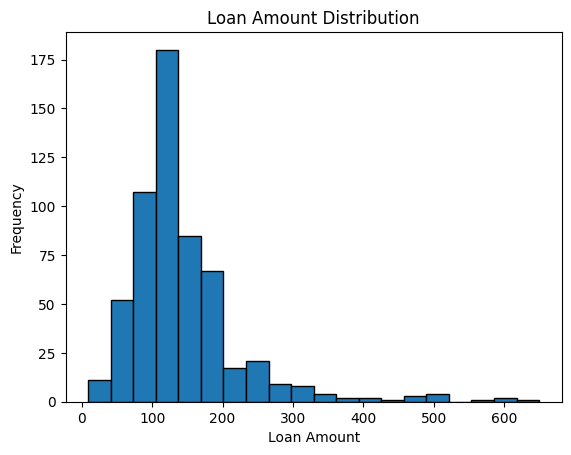

In [92]:
import matplotlib.pyplot as plt

loan_amount = df['LoanAmount']


plt.hist(loan_amount, bins=20, edgecolor='k') 


plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Loan Amount Distribution')

plt.show()

From the histogram it is clearly shown that the distribution of LoanAmount is not noraml. It is skewed to the right. Therfore the missing value imputation need to use the median

For the variables Dependents , Loan_Amount_Term , Credit_History the mode can be used as there varible type is object

In [93]:
dependents_mode = df['Dependents'].mode()[0]
df['Dependents'].fillna(dependents_mode, inplace=True)

loan_amount_mean = df['LoanAmount'].median()
df['LoanAmount'].fillna(loan_amount_mean, inplace=True)

loan_amount_term_mode = df['Loan_Amount_Term'].mode()[0]
df['Loan_Amount_Term'].fillna(loan_amount_term_mode, inplace=True)

credit_history_mode = df['Credit_History'].mode()[0]
df['Credit_History'].fillna(credit_history_mode, inplace=True)


In [94]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There are no missing values after the imputation

### Checking Duplicate Values

In [19]:
df.duplicated().sum()

0

There are no duplicate values in the dataset

## Exploratory Data Analysis

**Analysis on Response Variable**

In [95]:

loan_status_counts = df['Loan_Status'].value_counts()

print(loan_status_counts)


Loan_Status
Y    411
N    187
Name: count, dtype: int64


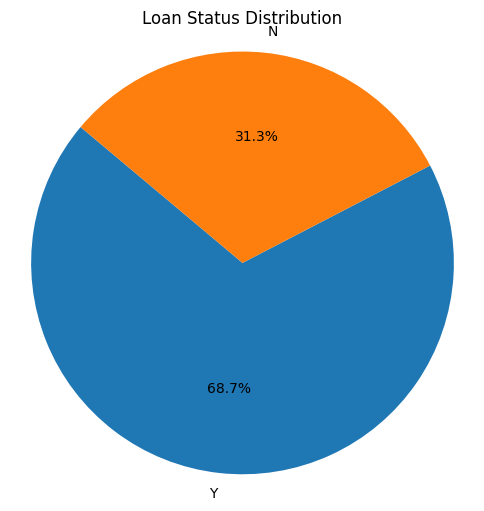

In [96]:

loan_status_counts = df['Loan_Status'].value_counts()


plt.figure(figsize=(6, 6))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Loan Status Distribution')

plt.axis('equal')  
plt.show()


More than 68% loans has been approved 

**Univariate Analysis**

In [106]:

loan_status_counts = df['Credit_History'].value_counts()

print(loan_status_counts)

Credit_History
1.0    512
0.0     86
Name: count, dtype: int64


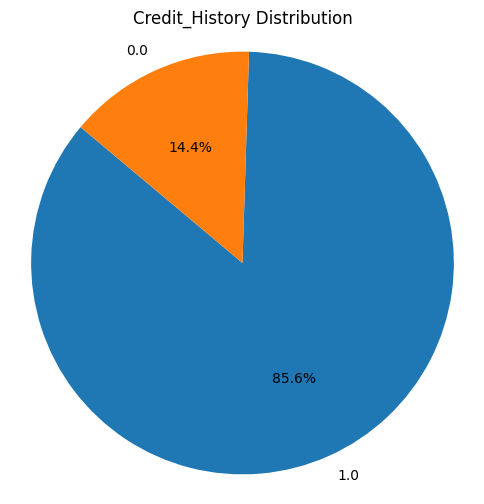

In [107]:
Credit_History_counts = df['Credit_History'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(Credit_History_counts, labels=Credit_History_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Credit_History Distribution')

plt.axis('equal')  
plt.show()

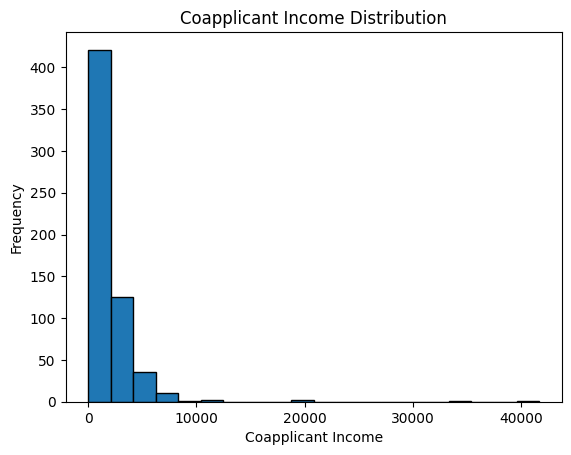

In [108]:
Coapplicant_Income = df['CoapplicantIncome']


plt.hist(Coapplicant_Income, bins=20, edgecolor='k') 


plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.title('Coapplicant Income Distribution')

plt.show()

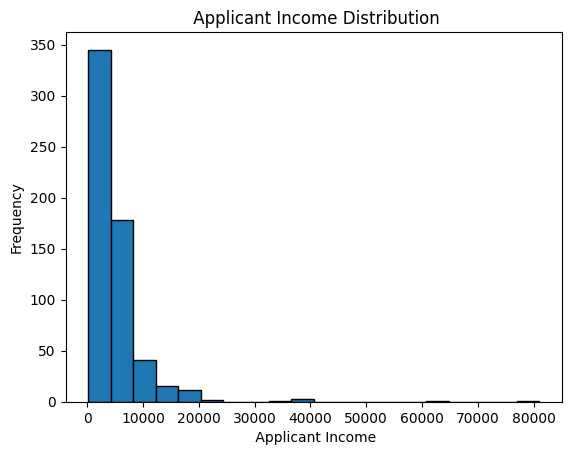

In [109]:
Applicant_Income = df['ApplicantIncome']


plt.hist(Applicant_Income, bins=20, edgecolor='k') 


plt.xlabel(' Applicant Income')
plt.ylabel('Frequency')
plt.title(' Applicant Income Distribution')

plt.show()

In [110]:



categorical_columns = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]

for column in categorical_columns:
    value_counts = df[column].value_counts()
    print(f"Value Counts for {column}:")
    print(value_counts)
    print("\n")


Value Counts for Gender:
Gender
Male      487
Female    111
Name: count, dtype: int64


Value Counts for Married:
Married
Yes    388
No     210
Name: count, dtype: int64


Value Counts for Dependents:
Dependents
0.0    350
1.0    101
2.0     99
3.0     48
Name: count, dtype: int64


Value Counts for Education:
Education
Graduate        465
Not Graduate    133
Name: count, dtype: int64


Value Counts for Self_Employed:
Self_Employed
No     488
Yes    110
Name: count, dtype: int64


Value Counts for Property_Area:
Property_Area
Semiurban    225
Urban        198
Rural        175
Name: count, dtype: int64




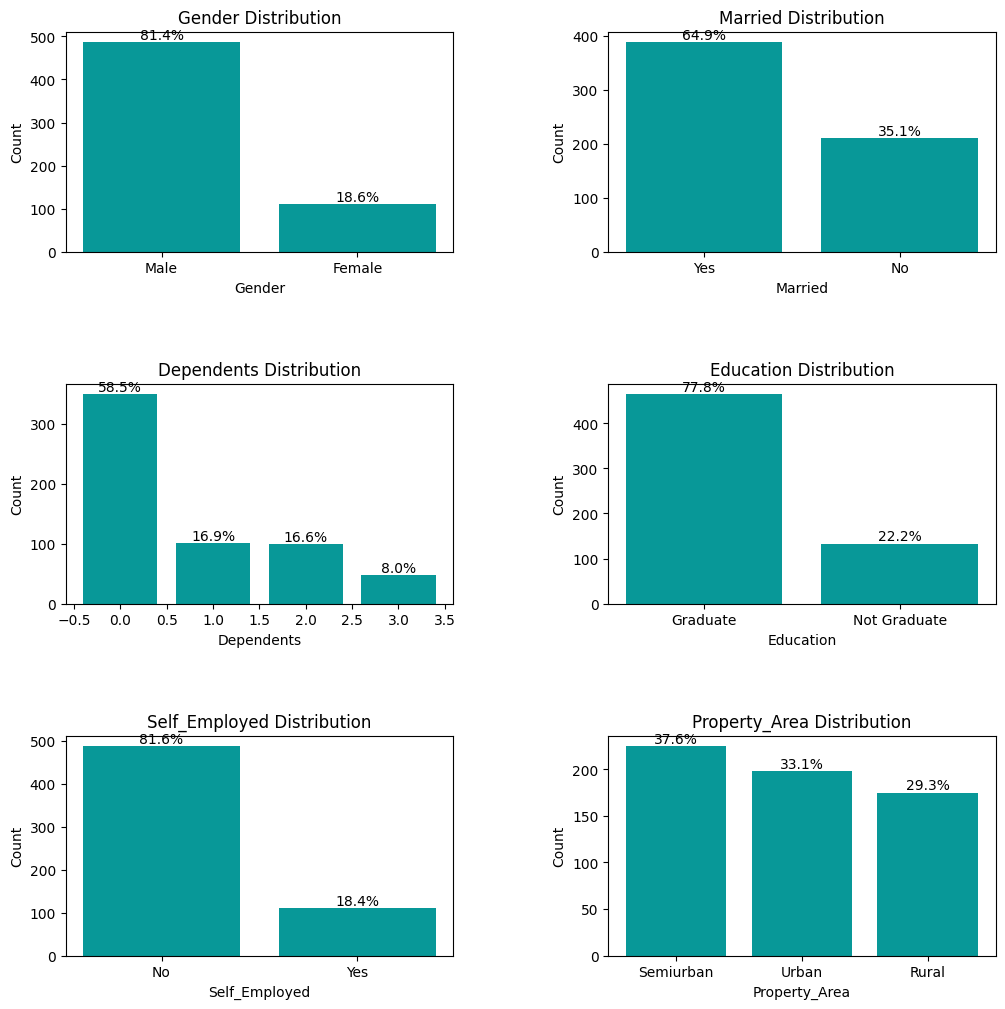

In [111]:
import matplotlib.pyplot as plt

categorical_columns = ["Gender", "Married", "Dependents", "Education", "Self_Employed","Property_Area"]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i, column in enumerate(categorical_columns):
    row = i // 2
    col = i % 2
    
    
    value_counts = df[column].value_counts()
    
    
    total = len(df[column])
    percentages = value_counts / total * 100
    
   
    ax = axes[row, col]
    bars = ax.bar(value_counts.index, value_counts.values, color='#089898')
    ax.set_title(f'{column} Distribution')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    
    
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height/total:.1%}', (bar.get_x() + bar.get_width() / 2., height),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')


for i in range(len(categorical_columns), 6):
    fig.delaxes(axes[i // 2, i % 2])


plt.show()


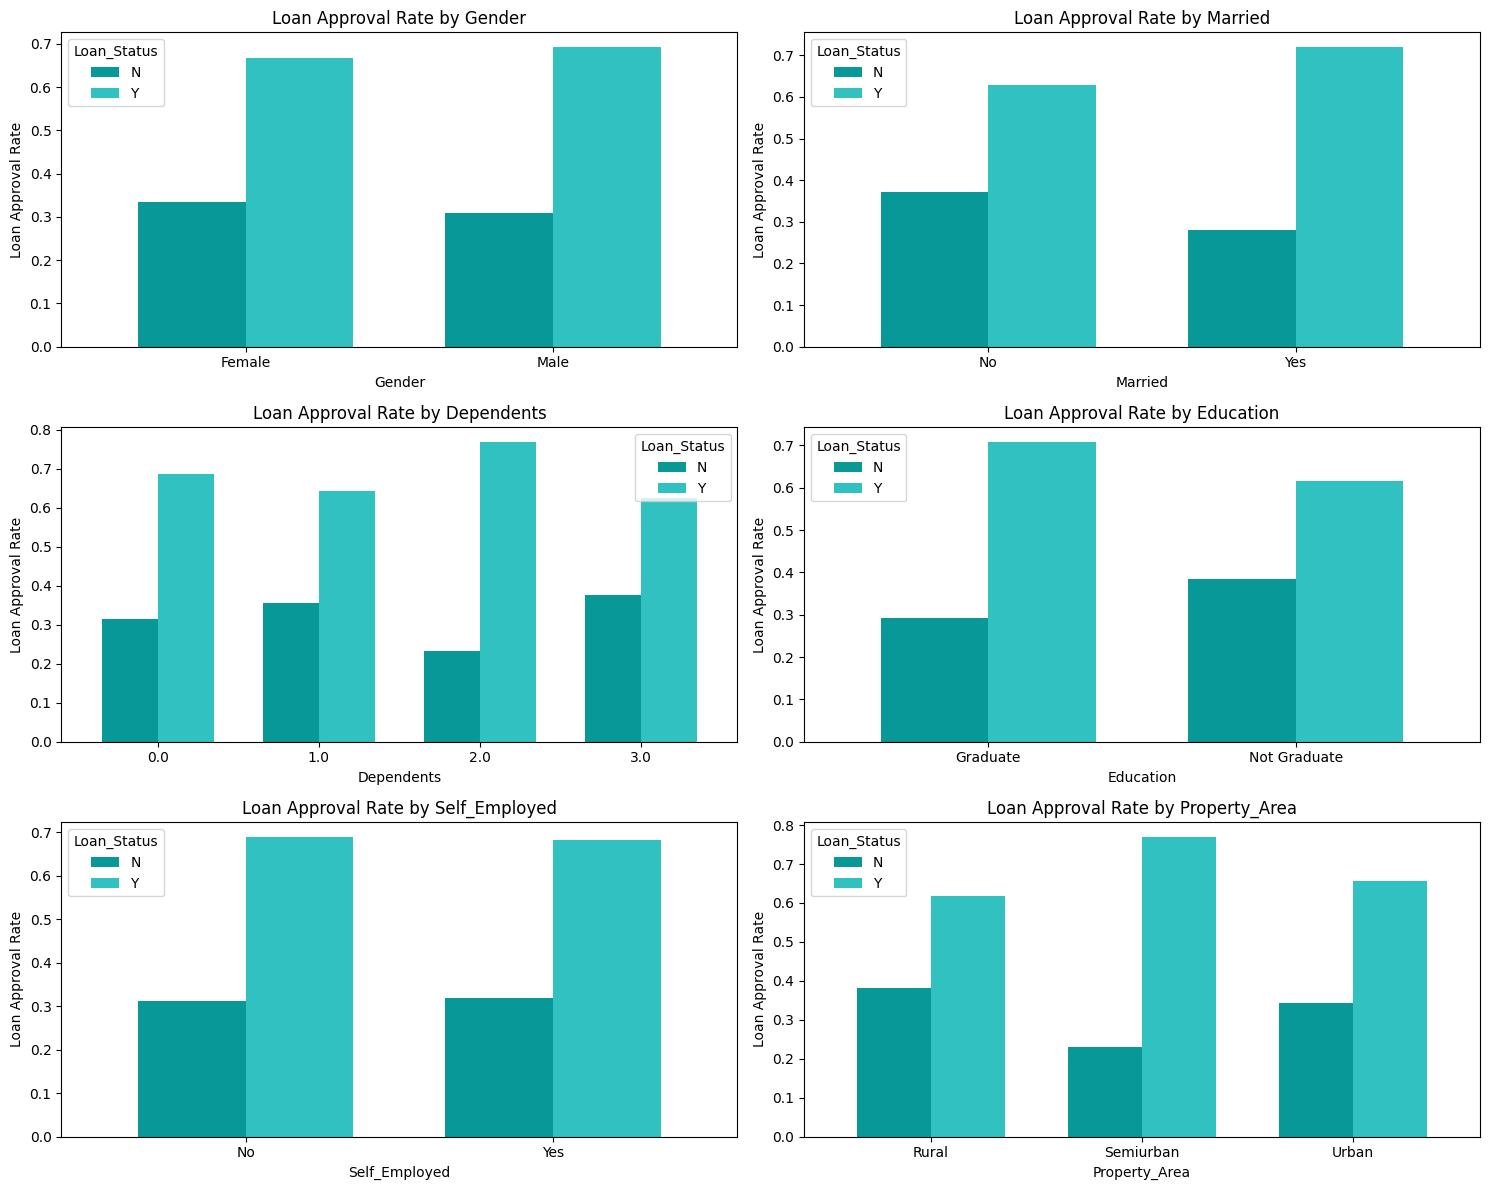

In [113]:

import math


variables = [ "Gender", "Married", "Dependents", "Education", "Self_Employed","Property_Area"]

num_rows = 3
num_cols = 2
num_plots = num_rows * num_cols


fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 12))


axes = axes.flatten()


for i, variable in enumerate(variables):
    
    claim_rates = df.groupby([variable, 'Loan_Status'])['Loan_Status'].count().unstack().fillna(0)
    
    
    claim_rates = claim_rates.div(claim_rates.sum(axis=1), axis=0)
    
    
    ax = axes[i]
    claim_rates.plot(kind='bar', ax=ax, color=['#089898', '#31c1c1'], width=0.7)
    ax.set_title(f'Loan Approval Rate by {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Loan Approval Rate')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)  

for i in range(len(variables), num_plots):
    fig.delaxes(axes[i])


plt.tight_layout()


plt.show()


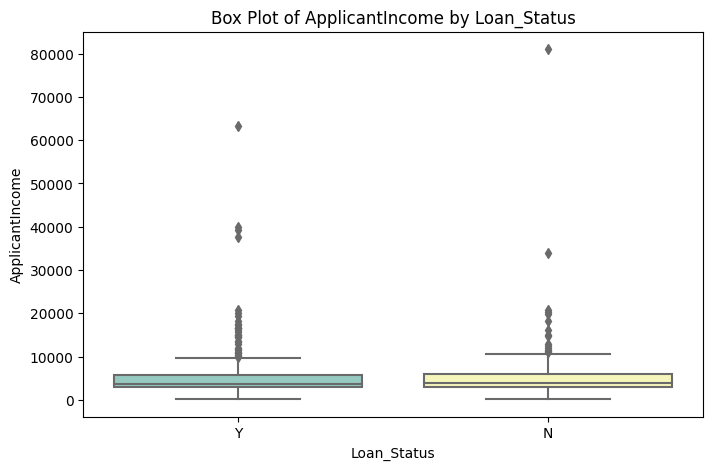

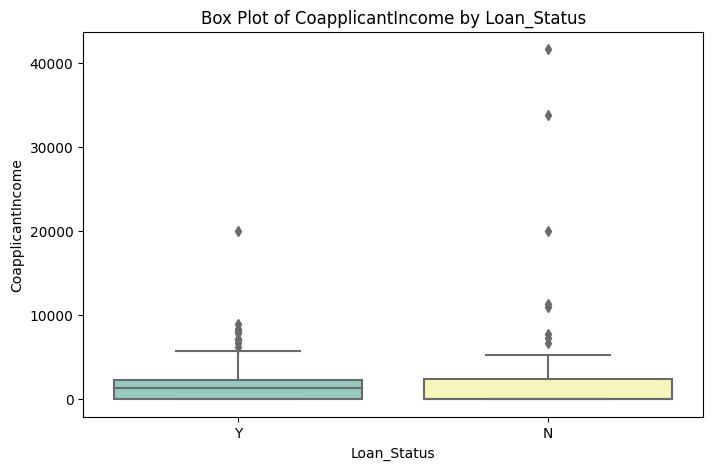

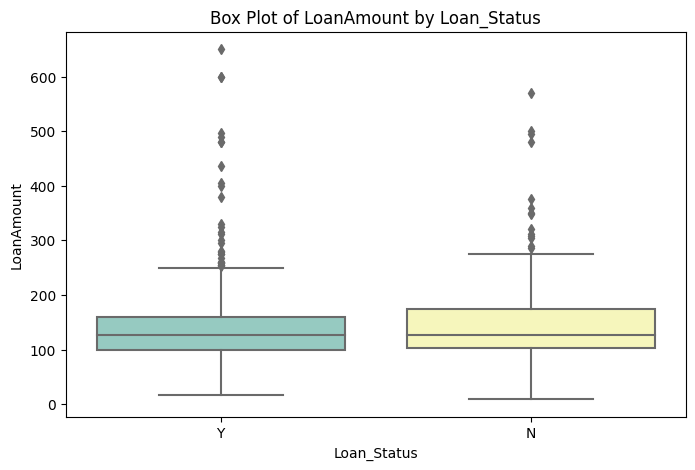

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

variables = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]


for variable in variables:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="Loan_Status", y=variable, data=df, palette="Set3")
    plt.title(f"Box Plot of {variable} by Loan_Status")
    plt.xlabel("Loan_Status")
    plt.ylabel(variable)
    plt.show()


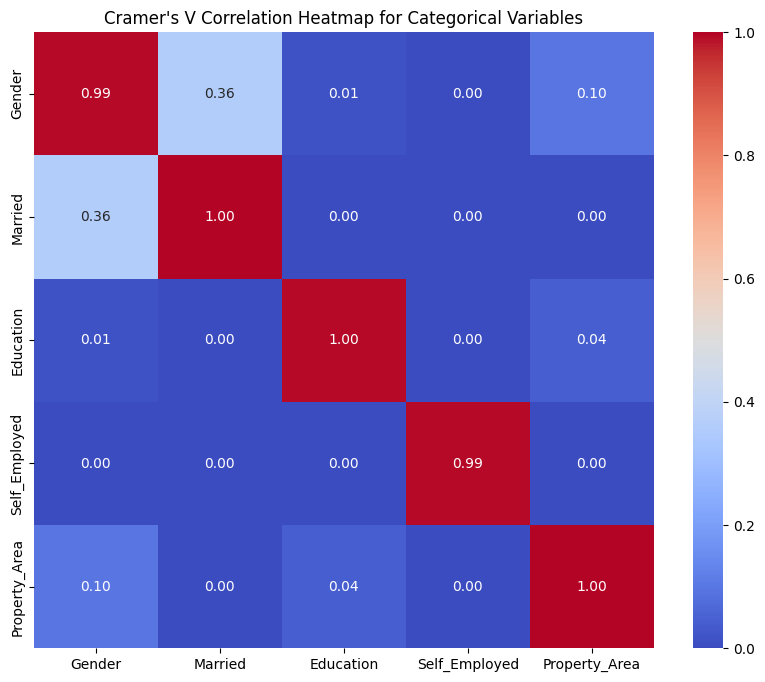

In [116]:

from scipy.stats import chi2_contingency

categorical_vars = ["Gender", "Married", "Education", "Self_Employed", "Property_Area"]

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramer_matrix = np.zeros((len(categorical_vars), len(categorical_vars)))
for i in range(len(categorical_vars)):
    for j in range(len(categorical_vars)):
        cramer_matrix[i, j] = cramers_v(df[categorical_vars[i]], df[categorical_vars[j]])

plt.figure(figsize=(10, 8))
sns.heatmap(cramer_matrix, annot=True, cmap="coolwarm", fmt=".2f", xticklabels=categorical_vars, yticklabels=categorical_vars)
plt.title("Cramer's V Correlation Heatmap for Categorical Variables")
plt.show()


## Advanced Analysis



In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         598 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         598 non-null    float64
 9   Loan_Amount_Term   598 non-null    float64
 10  Credit_History     598 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [118]:
df = df.drop("Loan_ID", axis=1)


In [119]:

df['Dependents'] = df['Dependents'].astype('category')
df['Credit_History'] = df['Credit_History'].astype('category')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype('category')

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             598 non-null    object  
 1   Married            598 non-null    object  
 2   Dependents         598 non-null    category
 3   Education          598 non-null    object  
 4   Self_Employed      598 non-null    object  
 5   ApplicantIncome    598 non-null    int64   
 6   CoapplicantIncome  598 non-null    float64 
 7   LoanAmount         598 non-null    float64 
 8   Loan_Amount_Term   598 non-null    category
 9   Credit_History     598 non-null    category
 10  Property_Area      598 non-null    object  
 11  Loan_Status        598 non-null    object  
dtypes: category(3), float64(2), int64(1), object(6)
memory usage: 44.6+ KB


In [121]:

categorical_columns = df.select_dtypes(include=['object', 'category'])

print(categorical_columns.columns)


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [122]:
categorical_cols = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Loan_Amount_Term", "Credit_History", "Property_Area"]


In [123]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)
df=df_encoded

#### Splitting the Dataset

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y = df["Loan_Status"]
X = df.drop(["Loan_Status"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Logistic Regression

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

# model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8167

Confusion Matrix:
 [[15 20]
 [ 2 83]]

Classification Report:
               precision    recall  f1-score   support

           N       0.88      0.43      0.58        35
           Y       0.81      0.98      0.88        85

    accuracy                           0.82       120
   macro avg       0.84      0.70      0.73       120
weighted avg       0.83      0.82      0.79       120



### Logistic Regression with Regularization

In [126]:
# Ridge (L2 regularization)
ridge_logistic_model = LogisticRegression(penalty='l2', C=0.5, random_state=42)  # You can adjust the value of C
ridge_logistic_model.fit(X_train, y_train)
y_pred = ridge_logistic_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.825

Confusion Matrix:
 [[15 20]
 [ 1 84]]

Classification Report:
               precision    recall  f1-score   support

           N       0.94      0.43      0.59        35
           Y       0.81      0.99      0.89        85

    accuracy                           0.82       120
   macro avg       0.87      0.71      0.74       120
weighted avg       0.85      0.82      0.80       120



## Decision tree Model

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Decision Tree Classifier Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Decision Tree Classifier Accuracy: 0.6916666666666667

Confusion Matrix:
 [[18 17]
 [20 65]]

Classification Report:
               precision    recall  f1-score   support

           N       0.47      0.51      0.49        35
           Y       0.79      0.76      0.78        85

    accuracy                           0.69       120
   macro avg       0.63      0.64      0.64       120
weighted avg       0.70      0.69      0.70       120



## Naive Bayes Model

In [129]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred = naive_bayes_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Gaussian Naive Bayes Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)

Gaussian Naive Bayes Accuracy: 0.8

Confusion Matrix:
 [[15 20]
 [ 4 81]]

Classification Report:
               precision    recall  f1-score   support

           N       0.79      0.43      0.56        35
           Y       0.80      0.95      0.87        85

    accuracy                           0.80       120
   macro avg       0.80      0.69      0.71       120
weighted avg       0.80      0.80      0.78       120



## Support Vector Machine

In [128]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC(kernel='linear', random_state=42) 
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("SVM Classifier Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", classification_rep)


SVM Classifier Accuracy: 0.7916666666666666

Confusion Matrix:
 [[14 21]
 [ 4 81]]

Classification Report:
               precision    recall  f1-score   support

           N       0.78      0.40      0.53        35
           Y       0.79      0.95      0.87        85

    accuracy                           0.79       120
   macro avg       0.79      0.68      0.70       120
weighted avg       0.79      0.79      0.77       120

